# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# data = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')
data= pd.read_csv('datasets/real_estate_data.csv', sep='\t')

#### Знакомство с датафреймом

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [3]:
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

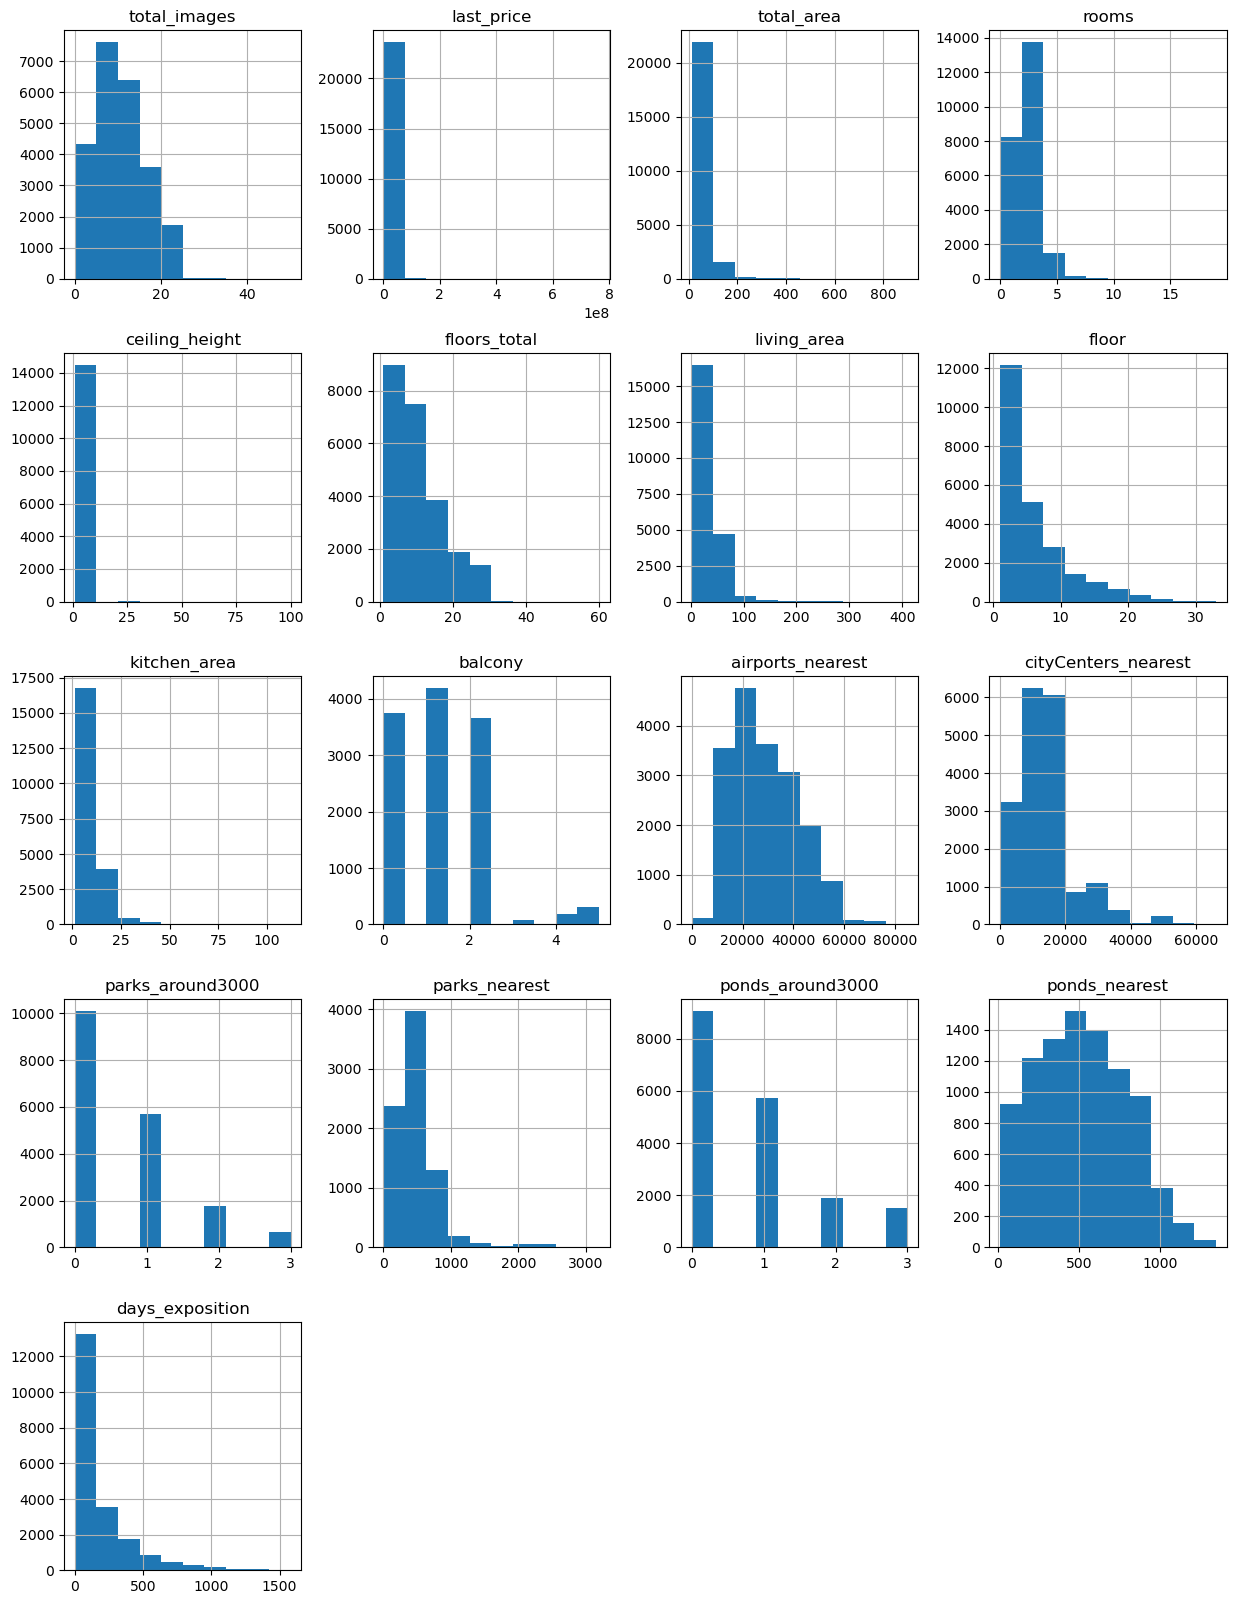

In [4]:
data.hist(figsize=(15,20))

### Предобработка данных

#### Найдите и изучите пропущенные значения в столбцах

In [5]:
data.isna().sum().sort_values()

total_images                0
open_plan                   0
floor                       0
rooms                       0
studio                      0
total_area                  0
last_price                  0
first_day_exposition        0
locality_name              49
floors_total               86
living_area              1903
kitchen_area             2278
days_exposition          3181
ponds_around3000         5518
parks_around3000         5518
cityCenters_nearest      5519
airports_nearest         5542
ceiling_height           9195
balcony                 11519
ponds_nearest           14589
parks_nearest           15620
is_apartment            20924
dtype: int64

Разделим на группы: 
- **картографические**: <br>
airports_nearest — расстояние до ближайшего аэропорта в метрах (м) **5542**<br>
parks_around3000 — число парков в радиусе 3 км **5518** <br>
parks_nearest — расстояние до ближайшего парка (м) **15620** <br>
ponds_around3000 — число водоёмов в радиусе 3 км **5518** <br>
ponds_nearest — расстояние до ближайшего водоёма (м) **14589** <br>
cityCenters_nearest — расстояние до центра города (м) **5519** <br>

- **добавленные пользователем**:<br>
balcony — число балконов, **11519**<br>
ceiling_height — высота потолков (м), **9195**<br>
days_exposition — сколько дней было размещено объявление (от публикации до снятия), **3181** <br>
floors_total — всего этажей в доме **86** <br>
is_apartment — апартаменты (булев тип) **20924** <br>
kitchen_area — площадь кухни в квадратных метрах (м²) **2278** <br>
living_area — жилая площадь в квадратных метрах (м²), **1903** <br>

   Пропуски в группе **картографические** связаны с тем что в базе данных указанный адрес не был найден в базе, а в базе в этом слове была буква е вместо ё или указали поселок городского типа вместо поселка и т.д. Так же это могло произойти потому указанный адрес не имеет ни ближайших парков, ни ближайших водоёмов, ни аэропортов. 
   Практически совпадает количество пропусков в airports_nearest, parks_around3000, ponds_around3000, cityCenters_nearest.
    
   Из группы **добавленные пользователем**:  <br>
   число балконов: пропущенные логично заменить на 0.<br>
   высота потолков: обработаем аномалии, затем пропуски заполним медианным значением<br>
   days_exposition: **важный параметр** и пропусков много. Если в нём есть пропуск, то  мы не можем сказать что квартира была продана или объявление о продаже снято. <br>
   floors_total пропусков мало. можно безболезненно отбросить . <br>
   is_apartment **важный параметр** пропущенные логично заменить на 0: если явно не указали, то 0. Кстати, в среднем апартаменты дороже квартир.  <br>
   kitchen_area: **важный параметр** и пропусков немало. заполним по группам. <br>
   living_area: **важный параметр** жилая площадь. Если пропуск,то логично что  её нет, и это нежилое помещение, возможно апартаменты. <br>
   

##### balcony, is_apartment

In [6]:
data['balcony']=data['balcony'].fillna(0)
data['is_apartment']=data['is_apartment'].fillna(False)

пропуски в balcony заполняем нулями, пропуски в is_apartment заполняем false

##### days_exposition

Если в нём есть пропуск, то мы не можем сказать что квартира была продана или объявление о продаже снято. избавим нас от возможных сомнений

In [7]:
# data=data.dropna(subset='days_exposition')

##### parks_around3000, parks_nearest, airports_nearest, ponds_nearest. Корректировка locality_name

сгруппируем по locality_name и заполним пропуски в тех данных где такой же locality_name, медианным по ним. Предварительно поправим locality_name

In [8]:
data['parks_around3000']=data['parks_around3000'].fillna(0)
data['ponds_around3000']=data['ponds_around3000'].fillna(0)
data['parks_nearest']=data['parks_nearest'].fillna(0)
data['airports_nearest']=data['airports_nearest'].fillna(0)
data['ponds_nearest']=data['ponds_nearest'].fillna(0)

преобразуем все названия к одному, нижний регистр, заменим ё на е, поселок городского типа и городской поселок на поселок

In [9]:
data['locality_name']=(
    data['locality_name'].
    str.lower().
    str.replace('ё','е').
    str.replace('городской поселок','поселок городского типа').
    str.replace('поселок городского типа','поселок'))
data['locality_name']=data['locality_name'].fillna('неизвестно')

#### Обработка пропусков в добавленных пользователем значениях

##### living_area, kitchen_area, floors_total

In [10]:
data_temp=data.query('total_area>0')
data_temp=data_temp.query('living_area>0')
data_temp=data_temp.query('400000<last_price<14000000')
living_to_total=data_temp['living_area'].median()/data_temp['total_area'].median()

data.loc[data['living_area'].isna(),'living_area'] = data['total_area']*living_to_total

kitchen_to_total=data_temp['kitchen_area'].median()/data_temp['total_area'].median()

data.loc[data['kitchen_area'].isna(),'kitchen_area'] = data['total_area']*kitchen_to_total

data=data.dropna(subset=['floors_total']) # этих пропусков очень мало, всего 86

#### Преобразования данных и их типов

##### first_day_exposition

In [11]:
data['first_day_exposition']=pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%dT%H:%M:%S')

##### ceiling_height

для потолков с значением больше 10, высоту разделим на 10. скорее всего ошиблись при заполнении на порядок

In [12]:
data_ceiling_bad = data.query('ceiling_height>10')
for val in data.index:
    if val in data_ceiling_bad.index:
        data.loc[val,'ceiling_height'] = data.loc[val,'ceiling_height']/10
#         заполним пропуски медианным значением
data.loc[data['ceiling_height'].isna(),'ceiling_height'] = data.loc[~data['ceiling_height'].isna(),'ceiling_height'].median()

Преобразуем цену в тыс.руб.

In [13]:
data['last_price']=data['last_price']/1000

количество комнат

In [14]:
data['rooms']=data['rooms'].astype('int')

In [15]:
data['floors_total']=data['floors_total'].astype('int')

 ##### расстояние до центра, cityCenters_nearest 

In [16]:
data['cityCenters_nearest']=data['cityCenters_nearest']/1000
data_spb=data.query('locality_name == "санкт-петербург"')

# data.loc[data['cityCenters_nearest'].isna(),'cityCenters_nearest'] = data.query('400000<last_price<14000000').loc[~data['cityCenters_nearest'].isna(),'cityCenters_nearest'].median()

# data['cityCenters_nearest']
# data.query('cityCenters_nearest>=0')
# data['cityCenters_nearest'] = data['cityCenters_nearest'].astype('int')

#### Устранение аномалий

устраним аномалии по высоте потолка, цене, общей площади


In [17]:
data=data.query('2<ceiling_height<10 ')
data=data.query('400<last_price<14000')
data=data.query('living_area<100')
data = data.query('rooms>0')


In [18]:
21927/23698

0.9252679551016963

после предобработки размер уменьшился до 92% от начального

### Посчитайте и добавьте в таблицу новые столбцы

#### Цена одного квадратного метр,  price_per_meter

In [19]:
data['price_per_meter']=data['last_price']/data['total_area']

#### День, месяц, год публикации , publication_day, publication_month, publication_year

In [20]:
data['publication_day']=data['first_day_exposition'].dt.weekday
data['publication_month']=data['first_day_exposition'].dt.month
data['publication_year']=data['first_day_exposition'].dt.year

#### Тип этажа, floor_type

In [21]:
def categorize_floor_type(data):
    floor = data['floor']
    floors_total = data['floors_total']
    try:
        if floor == 1:
            return 'первый'
        elif floor == floors_total and floors_total>1:
            return 'последний'
        else:
            return 'другой'
    except:
            pass    
        
data['floor_type'] = data.apply(categorize_floor_type, axis =1)

#### последняя проверка

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21927 entries, 0 to 23698
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          21927 non-null  int64         
 1   last_price            21927 non-null  float64       
 2   total_area            21927 non-null  float64       
 3   first_day_exposition  21927 non-null  datetime64[ns]
 4   rooms                 21927 non-null  int32         
 5   ceiling_height        21927 non-null  float64       
 6   floors_total          21927 non-null  int32         
 7   living_area           21927 non-null  float64       
 8   floor                 21927 non-null  int64         
 9   is_apartment          21927 non-null  bool          
 10  studio                21927 non-null  bool          
 11  open_plan             21927 non-null  bool          
 12  kitchen_area          21927 non-null  float64       
 13  balcony         

### Проведите исследовательский анализ данных

#### Изучаем следующие параметры объектов

##### общая площадь; жилая площадь; площадь кухни;

(0.0, 30.0)

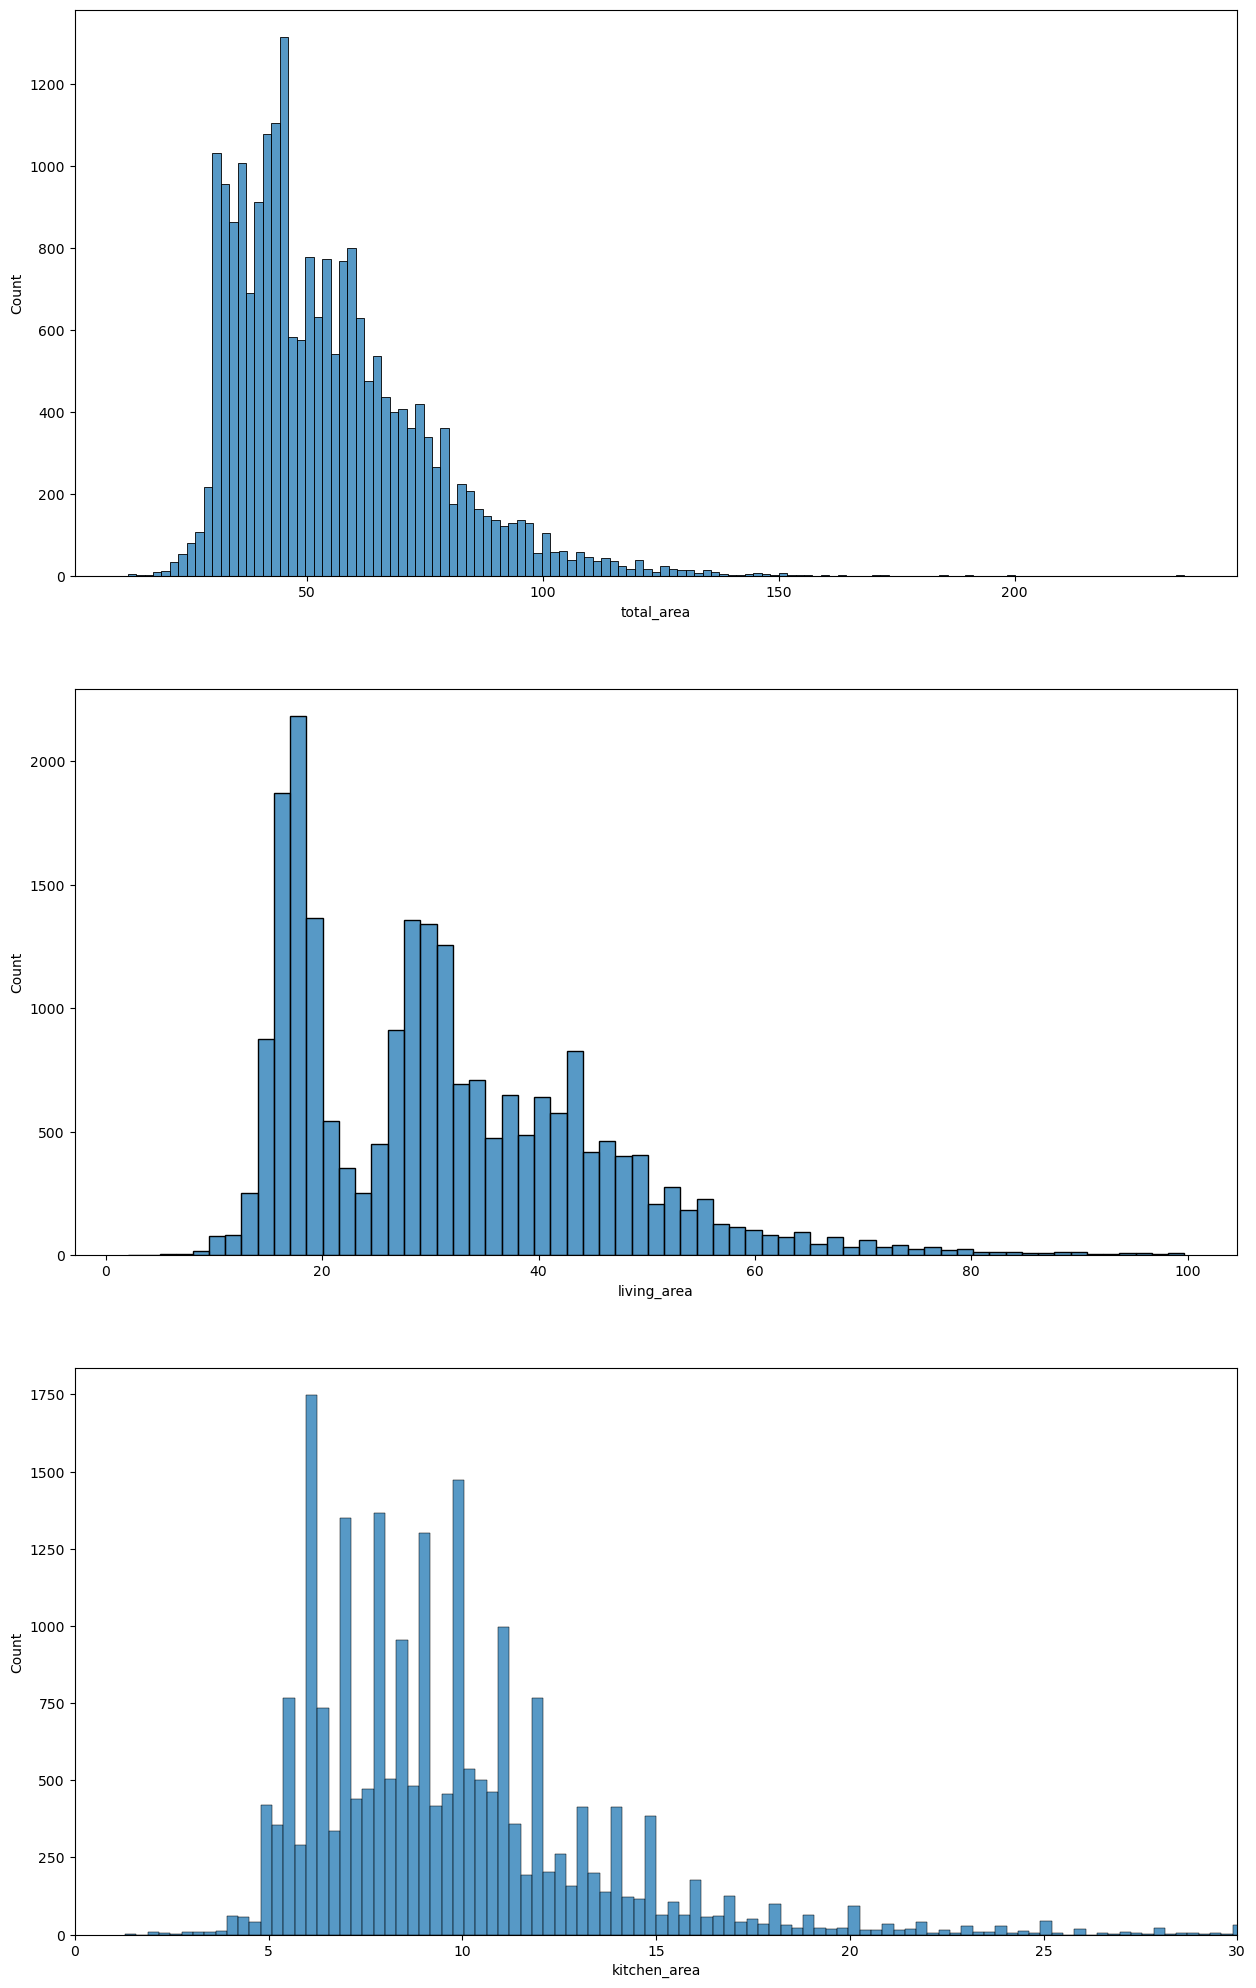

In [23]:
f, ax = plt.subplots(3, 1,figsize =(15,25))
sns.histplot(data['total_area'], ax=ax[0])
sns.histplot(data['living_area'], ax=ax[1])
sns.histplot(data['kitchen_area'], ax=ax[2]).set_xlim(0,30)


в случае общей площади распределение равномерное, без выбросов
в случае жилой площади видны два пика около 20м2, и 30м2. - самые популярные типы, соответствующие однокомнатным и двухкомнатным квартирам <br>
в случае площади кухни видны пики: площадь кухни в основном заполняют округленным до целого числом.

##### цена объекта; количество комнат; высота потолков;

(2.2, 3.5)

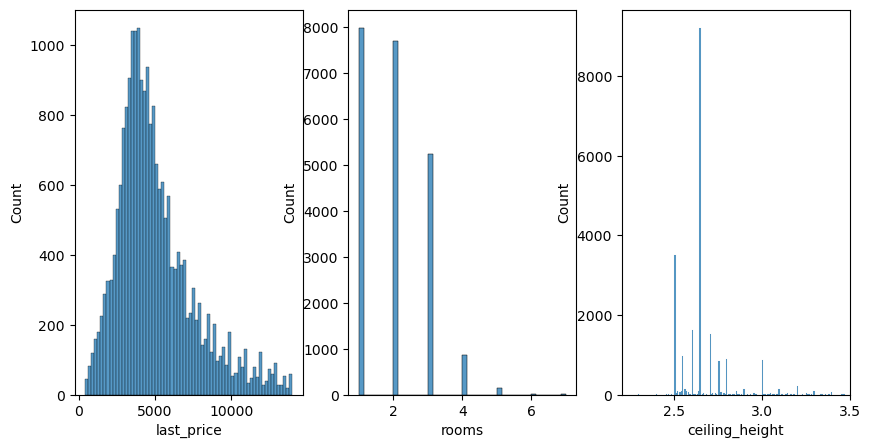

In [24]:
data=data.query('ceiling_height<10')
f, ax = plt.subplots(1, 3,figsize =(10,5))
sns.histplot(data['last_price'], ax=ax[0])
sns.histplot(data['rooms'], ax=ax[1])
sns.histplot(data['ceiling_height'], ax=ax[2]).set_xlim(2.2,3.5)

для цены хорошее, можно сказать равномерное распределение в рассматриваемой области
для комнат видно, что самые популярные это 1-комнатные квартиры, затем 2 и 3 комнатные
в случае высоты потолков - самое популярное выделящее стандартное значение 2.65м 

##### этаж квартиры; тип этажа квартиры («первый», «последний», «другой»); общее количество этажей в доме;

(1.0, 35.0)

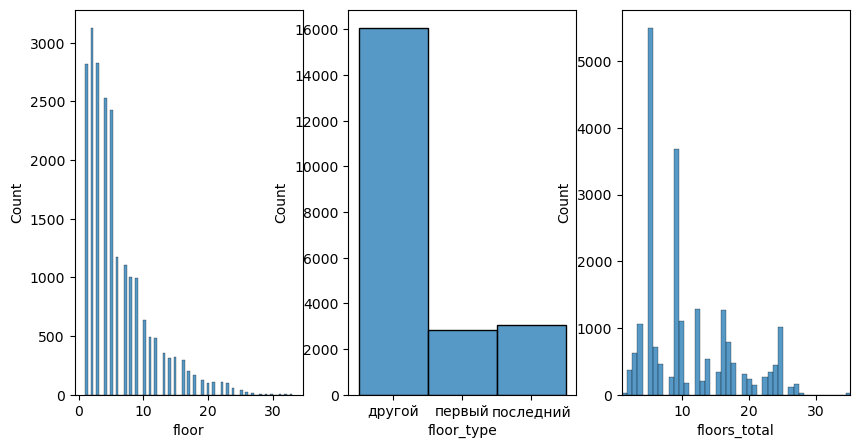

In [25]:
f, ax = plt.subplots(1, 3,figsize =(10,5))
sns.histplot(data['floor'], ax=ax[0])
sns.histplot(data['floor_type'], ax=ax[1])
sns.histplot(data['floors_total'], ax=ax[2]).set_xlim(1,35)

в случае этажей видно, что самые распространенные этажи, это с 1 по 5, скорее всего это пятиэтажные дома. высокоэтажных квартир продают заметно меньше, особенно выше 20 этажа.<br>
в случае типа этажа, заметно преобладают не первые и не последние этажи, но квартир с первых и последних этажей почти одинаково<br>
в случае общей высоты дома, то самые распространенные это пятиэтажные здания, затем 9 этажные.
ну а небоскребов практически нет.


##### расстояние до центра города в метрах; расстояние до ближайшего аэропорта; расстояние до ближайшего парка;

(100.0, 1000.0)

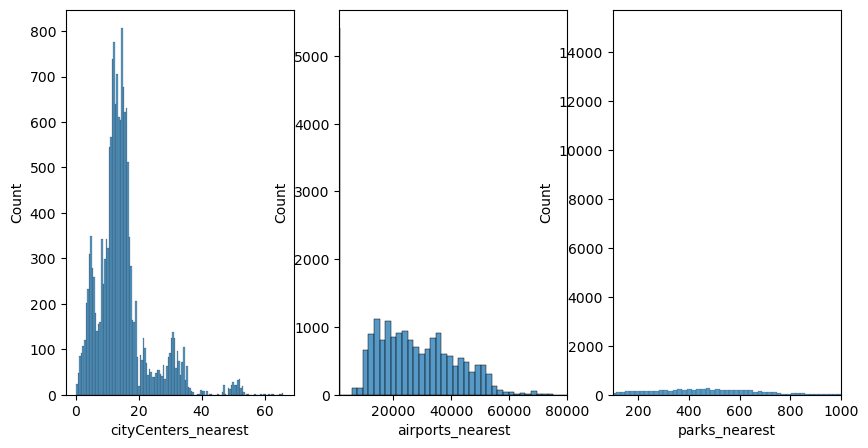

In [26]:
f, ax = plt.subplots(1, 3,figsize =(10,5))
sns.histplot(data['cityCenters_nearest'], ax=ax[0])
sns.histplot(data['airports_nearest'], ax=ax[1]).set_xlim(1600, 80000)
sns.histplot(data['parks_nearest'], ax=ax[2]).set_xlim(100, 1000)

в случае расположения к центру, основное количество объявлений - это квартиры где-то в 10-18км от центра, но есть так же пик на 5 км.
в случае удаленности от аэропорта - подавляющая часть квартир 10-50км от аэропорта

##### день и месяц публикации объявления.

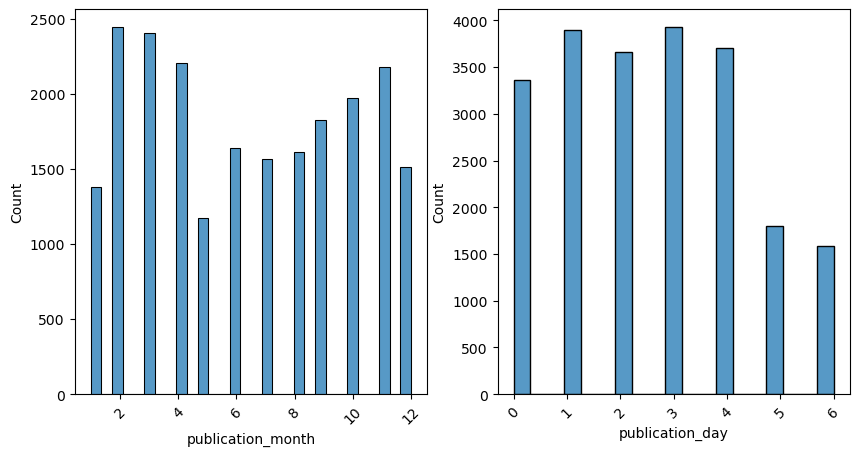

In [27]:
f, ax = plt.subplots(1, 2,figsize =(10,5))
sns.histplot(data['publication_month'],bins=30, ax=ax[0]).tick_params(axis='x', rotation=45)
sns.histplot(data['publication_day'],bins=19, ax=ax[1]).tick_params(axis='x', rotation=45)

в случае месяца публикаций, чаще всего на продажу квартиры выставляют в ферврале и ноябре, а из летних месяцев 
затем март и ноябрь. а самый непопулярный месяц - это апрель. видимо в разгаре весны люди менее охото хотят
заниматься продажей недвижимости
в случае дня публикации - самые частые дни это четверг,затем вторник и пятница. неудивительно что по 
выходным люди отдыхают, в том числе и от имущественных дел

#### Изучите, как быстро продавались квартиры (столбец days_exposition). 

<AxesSubplot:xlabel='days_exposition', ylabel='Count'>

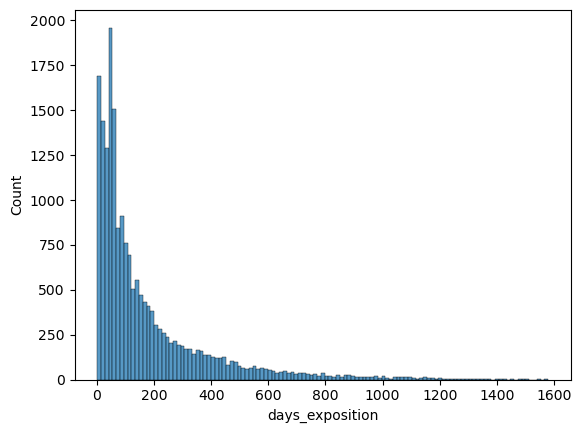

In [28]:
# data.pivot_table(index = 'days_exposition', aggfunc='median').hist(figsize=(15,20))
sns.histplot(data['days_exposition'])

In [29]:
data['days_exposition'].describe()

count    19186.000000
mean       175.725842
std        214.068985
min          1.000000
25%         44.000000
50%         93.000000
75%        223.000000
max       1580.000000
Name: days_exposition, dtype: float64

**Среднее время продажи - 175 дней. Медианное - 93 дня.
Быстрой продажей можно считать то объявление, которое было снято быстрее чем за 44 дней.
А необычно долгой - 223 дней и более.**

Есть пик. Исследуем его на диаграмме размаха 

(0.0, 500.0)

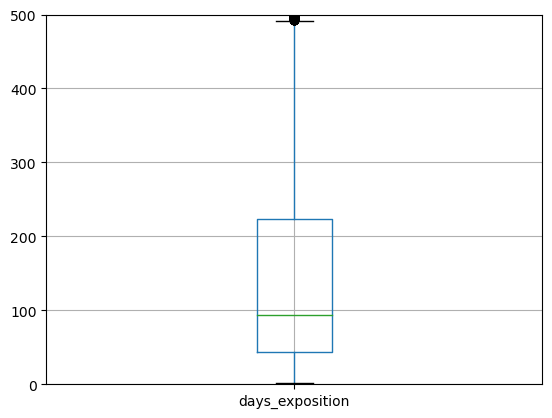

In [30]:
# построим диаграмму размаха
data.boxplot('days_exposition')
plt.ylim(0,500) # ограничим до 500

пик 100 дней после продажи попадает в ящик, значит находится между Q1 и Q3, что вроде бы означает что это не является выбросом

<AxesSubplot:>

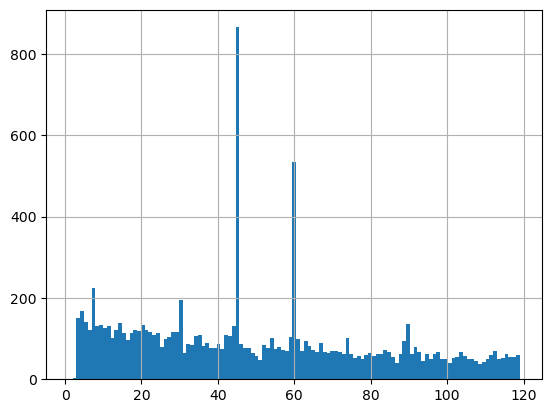

In [31]:
data_exp_corr=data.query('0<days_exposition<120')
data_exp_corr['days_exposition'].hist(bins=119)
# sns.histplot(data_exp_corr['days_exposition'])

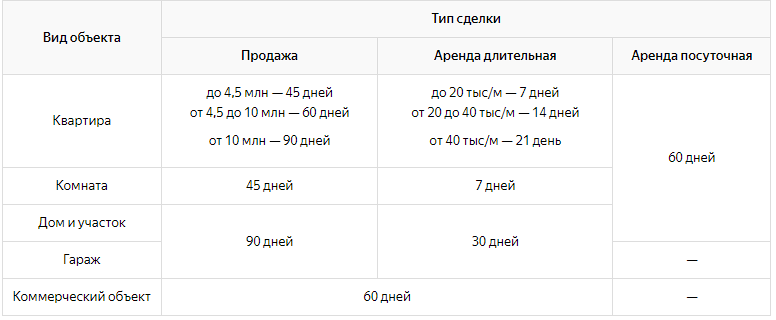

count    17593.000000
mean       187.272836
std        219.910931
min          1.000000
25%         42.000000
50%        107.000000
75%        244.000000
max       1580.000000
Name: days_exposition, dtype: float64

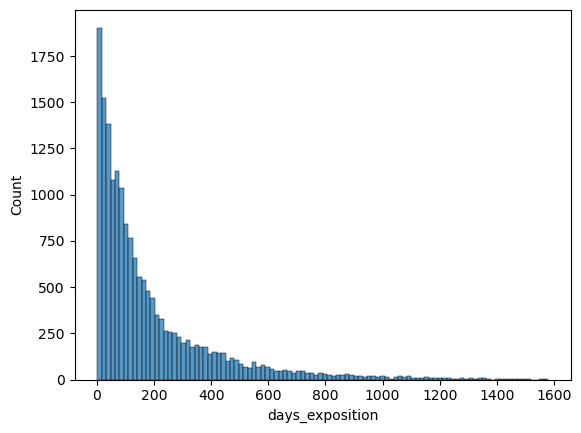

In [32]:
data.loc[(data['days_exposition']==60),'days_exposition']=0
data.loc[(data['days_exposition']==90),'days_exposition']=0
data.loc[(data['days_exposition']>=45)&(data['days_exposition']<45.5),'days_exposition']=0
data.loc[(data['days_exposition']==30),'days_exposition']=0

data=data.query('days_exposition>0')
sns.histplot(data['days_exposition'])
data['days_exposition'].describe()

теперь среднее время продажи - 187 дней. Медианное - 107 дней. Быстрой продажей можно считать то объявление, которое было снято быстрее чем за 42 дней. А необычно долгой - 244 дней и более.

#### Какие факторы больше всего влияют на общую (полную) стоимость объекта?

построим сводную таблицу 


In [33]:
data_pivot= (data.
 pivot_table(index = 'last_price', 
             values=['total_area','living_area','kitchen_area','rooms','floor','publication_day','publication_month','publication_year'], 
             aggfunc='median')
)
data_pivot['last_price']=data_pivot.index

<AxesSubplot:xlabel='last_price'>

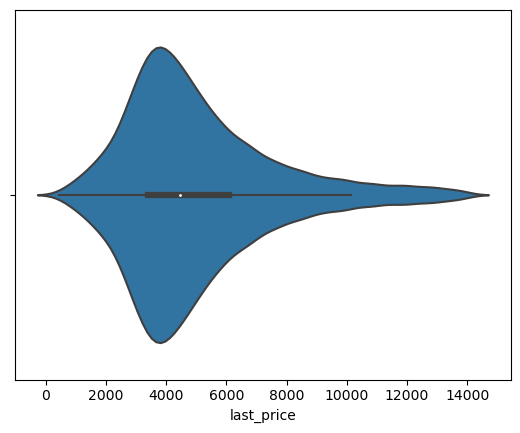

In [34]:
# good_price_data=data.query('0<last_price<14000')
sns.violinplot(x = data['last_price'])

In [35]:
data['last_price'].describe()

count    17593.000000
mean      5039.918779
std       2488.995730
min        430.000000
25%       3400.000000
50%       4472.000000
75%       6100.000000
max      13999.000000
Name: last_price, dtype: float64

медианная цена - 4.4млн, средняя - 4.9млн, ну а в общем можно сказать что нормальная цена квартиры колеблется в диапазоне от 2 до 8 млн. рублей., хотя так же можно сказать имеется немало дорогих квартир свыше 8млн,

##### Общая площадь

0.8185617399262173


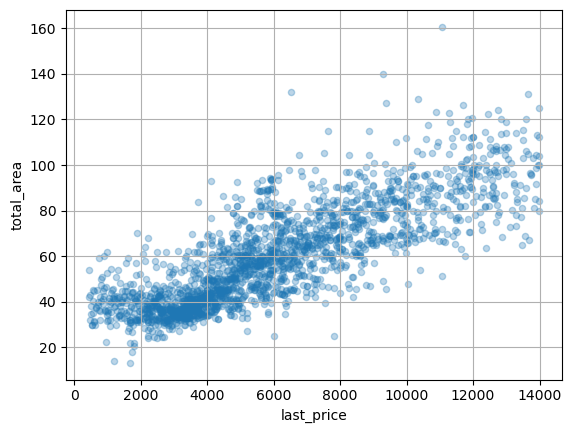

In [36]:
data_pivot.plot(x ='last_price', y = 'total_area', kind = 'scatter', alpha=0.3, grid = True)
print(data_pivot['last_price'].corr(data_pivot['total_area']))

корреляция - 0.81. Зависимость отчетливая. 
При цене от 2 млн до 4 млн, общая площадь - от 20 до 80 кв.м., 
При цене от 8 млн до 10 млн, общая площадь - от 40 до 120 кв.м.,
При цене от 10 млн до 12 млн, общая площадь - в основном свыше 60 кв.м,


##### Жилая площадь

0.6292107989453748


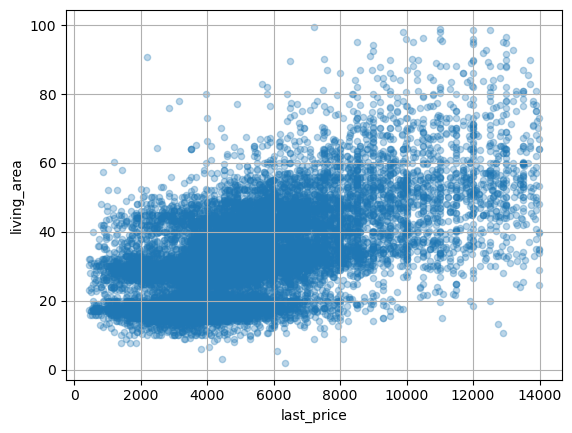

In [37]:
data.plot(x ='last_price', y = 'living_area', kind = 'scatter', alpha=0.3, grid = True)
print(data['last_price'].corr(data['living_area']))

корреляция - 0.61. 
зависимость есть, но меньше чем от общей площади.
при цене до 2 млн вы не встретите квартир с жилой площадью выше 50 кв.м.
при цене свыше 10 млн вы вряд ли найдете квартиру с жилой площадью менее 20 кв.м.

##### Площадь кухни

0.5405092143833621


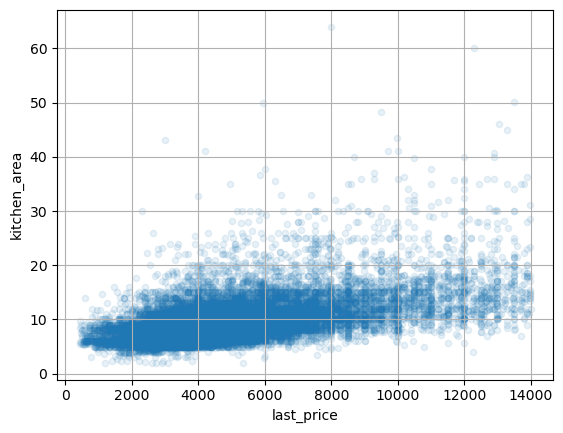

In [38]:
data.plot(x ='last_price', y = 'kitchen_area', kind = 'scatter', alpha=0.1, grid = True)
print(data['last_price'].corr(data['kitchen_area']))

зависимость есть, меньше чем от других параметров. параметр сильно колеблется. <br>
в общем можно сказать что при цене до 2 млн, нет квартир с площадью кухни более 15 кв.м.,<br>
а при цене от 10 млн в основном все квартиры с площадью кухни более 10 кв.м<br>
можно сказать что кухни площадью более 30 кв.м - редкость,<br>
а площадью более 40 кв.м - редчайшая редкость<br>

##### количество комнат

построим ещё одну сводную таблицу для этих категориальных переменных

In [39]:
data_pivot= (data.
 pivot_table(index = 'last_price', 
             values=['rooms','floor','publication_day','publication_month','publication_year'], 
             aggfunc='min')
)
data_pivot['last_price']=data_pivot.index

0.5517008805290804


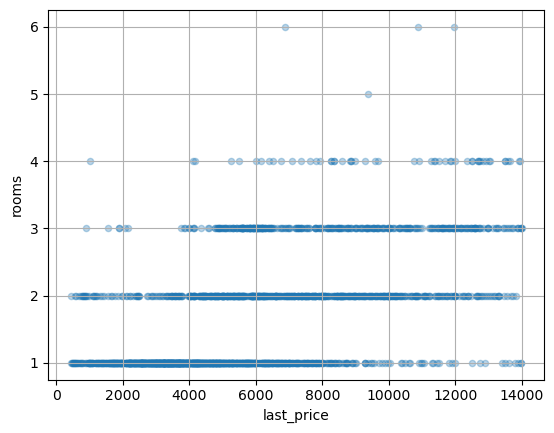

In [40]:
data_pivot.plot(x ='last_price', y = 'rooms', kind = 'scatter', alpha=0.3, grid = True)
print(data_pivot['last_price'].corr(data_pivot['rooms']))

однокомнатные квартиры в основном до 10 млн, двухкомнатные - популярны среди всего диапазона цены,
трехкомнатные - в основном от 4 млн

##### даты размещения

In [41]:
data_pivot= (data.
 pivot_table(index = 'last_price', 
             values=['rooms','floor','publication_day','publication_month','publication_year'], 
             aggfunc='median')
)
data_pivot['last_price']=data_pivot.index

-0.04475471757734418


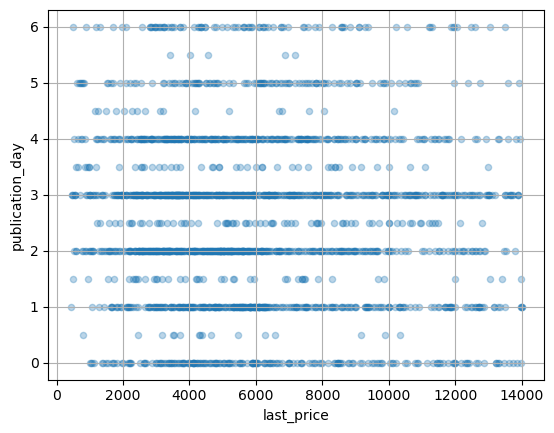

In [42]:
data_pivot.plot(x ='last_price', y = 'publication_day', kind = 'scatter', alpha=0.3, grid = True)
print(data_pivot['last_price'].corr(data_pivot['publication_day']))

-0.030065801009887237


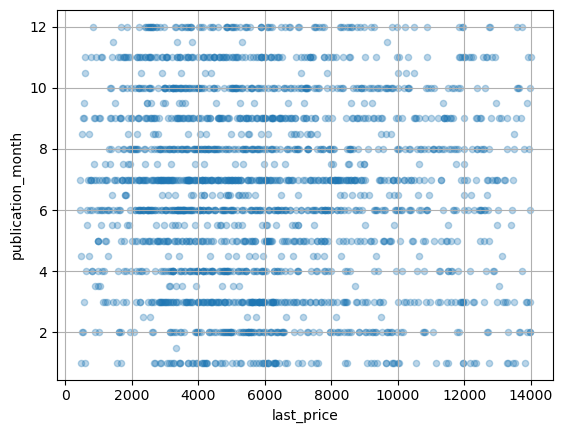

In [43]:
data_pivot.plot(x ='last_price', y = 'publication_month', kind = 'scatter', alpha=0.3, grid = True)
print(data_pivot['last_price'].corr(data_pivot['publication_month']))

-0.11138470605567931


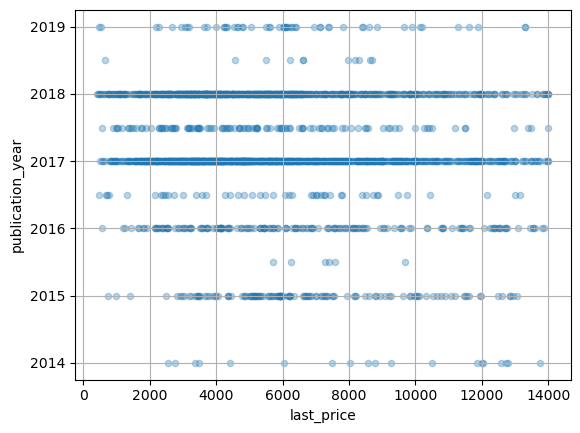

In [44]:
data_pivot.plot(x ='last_price', y = 'publication_year', kind = 'scatter', alpha=0.3, grid = True)
print(data_pivot['last_price'].corr(data_pivot['publication_year']))

судя по корреляции нельзя сделать вывод о увеличении стоимости продажи квартир, хотя и здравый смысл подсказывает обратное

##### тип этажа

In [45]:
data_pivot= (data.
 pivot_table(index = 'floor_type', 
             values= 'last_price', 
             aggfunc='median')
)


<AxesSubplot:xlabel='floor_type'>

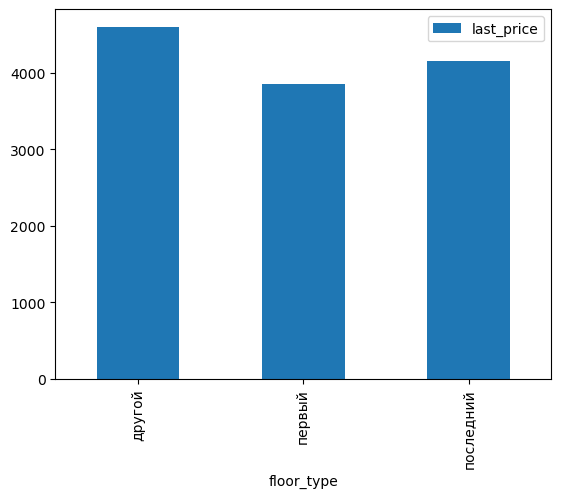

In [46]:
# sns.histplot(x=data_pivot.index,y=data_pivot['last_price'])
data_pivot.plot(kind='bar')

видно, что стоимость квартир на первом этаже ниже чем квартир с последних этажей. Разница в среднем 7%.
<br>так же видно, что стоимость квартир с других этажей заметно выше чем квартир с последних этажей. Разница около 13%. Людям больше нравятся не первые и не последние этажи

####  Посчитайте среднюю цену одного квадратного метра

Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце locality_name.

In [47]:
data_pivot = data['locality_name'].value_counts().sort_values(ascending=False)
top_localities=data_pivot.index
top_10_localities=top_localities[0:10]
top_10_localities

(data.
 query('locality_name in @top_10_localities').groupby('locality_name')['price_per_meter'].mean().
 sort_values(ascending=False)
  )

locality_name
санкт-петербург      105.480321
пушкин               100.296033
деревня кудрово       91.878846
поселок парголово     90.021379
поселок мурино        84.895811
поселок шушары        77.675237
колпино               75.015811
гатчина               67.589286
всеволожск            66.617552
выборг                57.130166
Name: price_per_meter, dtype: float64

Самая высокая стоимость кв.метра ожидаемо Санкт-Петербурге - 106 тыс.руб. за кв.м.
Самая низкая в выборге - 58 тыс.руб. за кв.м.

#### цена за расстояние до центра в километрах

Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца locality_name и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города.

<AxesSubplot:xlabel='distance'>

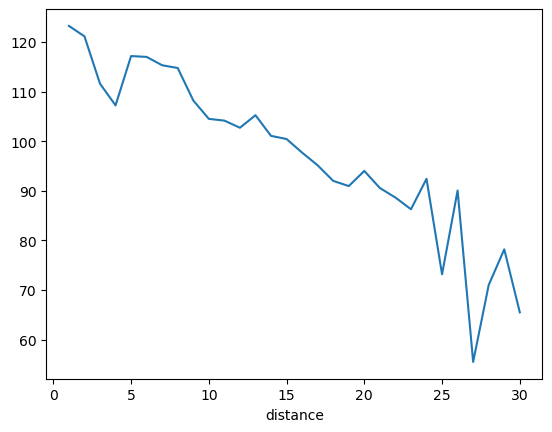

In [48]:
import numpy as np
data=data.query('locality_name == "санкт-петербург" ')

price_for_distance_from_center = (
    data.
    pivot_table(index='cityCenters_nearest',values ='price_per_meter',aggfunc='mean')
)
price_for_distance_from_center['cityCenters_nearest']=price_for_distance_from_center.index
# сформируем сводную таблицу, заберем индексы в отдельный столбец

price_for_distance_from_center= np.ceil(price_for_distance_from_center)
price_for_distance_from_center=price_for_distance_from_center.astype('int')
# округлим, преобразуем для красоты

price_for_distance_from_center.columns=['price_per_meter','distance']
price_for_distance_from_center
price_for_distance_from_center=price_for_distance_from_center.groupby('distance')['price_per_meter'].mean()
# укрупним группы через сводную таблицу, т.к. мы округлили до целых км
price_for_distance_from_center.plot()

если усреднить, то в среднем цена за каждый километр ближе к центру будет увеличиваться приблизительно на 2 тыс руб. за квадратный метр. На промежутке от 7 до 22 км это правило соблюдается. но после 22 км уже есть отклонения. а до 7 километров ближе к центру закономерность имеет свойство не соблюдаться. Скорее всего так как сам центр не является точкой как таковой, а районом.

### Общий вывод

После проделанный работы видно, что существует множество пропусков в данных: <br>
    что может быть связано в свою очередь с рядом факторов:<br>
    -при заполнении объявления продавец указывает адрес ошибочно, нужно чтобы они выбирал его из предложенного списка<br>
    -или ему выдавалось сообщение что текущий адрес не найден.<br>
    -так же часть объявлений уходит в архив или было снято, а данные о том что объявление ушло в 
    архив или снято отсутствуют.<br>
    -при заполнении некоторых параметров, например, высота потолков или этаж. нужно ввести адекватные ограничения, чтобы пользователь ошибчно не указал неправильные данные.<br>
    <br>**Длительность продажи квартир:**<br>
    среднее время продажи - 187 дней. Медианное - 107 дней. Быстрой продажей можно считать то объявление, которое было снято быстрее чем за 42 дней. А необычно долгой - 244 дней и более.<br>
   <br>**Исcледование параметров объектов**:<br>
   в случае общей площади распределение равномерное, без выбросов в случае жилой площади видны два пика около 20м2, и 30м2. - самые популярные типы в случае площади кухни виден аномальный пик - это пропуск, заполненный медианным значением<br>
   для цены хорошее, можно сказать равномерное распределение в рассматриваемой области
для комнат видно, что самые популярные это 1-комнатные квартиры, затем 2 и 3 комнатные<br>
в случае высоты потолков - самое популярное выделящее стандартное значение 2.65м<br>
    в случае этажей видно, что самые распространенные этажи, это с 1 по 5, скорее всего это пятиэтажные дома. высокоэтажных квартир продают заметно меньше, особенно выше 20 этажа.
в случае типа этажа, заметно преобладают не первые и не последние этажи, но квартир с последних этажей почему-то всё же заметно больше чем с первых этажей
в случае общей высоты дома, то самые распространенные это пятиэтажные здания, затем 9 этажные.
ну а небоскребов практически нет<br>
    в случае месяца публикаций, чаще всего на продажу квартиры выставляют в ферврале и ноябре, а из летних месяцев затем март и ноябрь. а самый непопулярный месяц - это апрель. видимо в разгаре весны люди менее охото хотят заниматься продажей недвижимости в случае дня публикации - самые частые дни это четверг,затем вторник и пятница. неудивительно что по выходным люди отдыхают, в том числе и от имущественных дел
    
 **Какие факторы больше всего влияют на общую (полную) стоимость объекта?**<br>
    **Зависимость от общей площади**<br>
    Зависимость отчетливая.<br> 
    При цене от 2 млн до 4 млн, общая площадь - от 20 до 80 кв.м., 
    При цене от 8 млн до 10 млн, общая площадь - от 40 до 120 кв.м.,
    При цене от 10 млн до 12 млн, общая площадь - от 50 до 150 кв.м.<br> 
    **Зависимость от жилой  площади** <br>
    зависимость есть, с ростом цены в среднем увеличивается и жилая площадь 
    но меньше чем от общей площади.<br>
при цене до 2 млн вы не встретите квартир с жилой площадью выше 50 кв.м.<br>
при цене свыше 10 млн вы вряд ли найдете квартиру с жилой площадью менее 20 кв.м.<br>
    **Зависимость от площади кухни** <br>
    в общем можно сказать что при цене до 2 млн, нет квартир с площадью кухни более 15 кв.м.,<br>
а при цене от 10 млн в основном все квартиры с площадью кухни более 10 кв.м<br>
можно сказать что кухни площадью более 30 кв.м - редкость,<br>
а площадью более 40 кв.м - редчайшая редкость<br> 
    **Зависимость от количества комнат** <br>
    однокомнатные квартиры стоят в основном до 10 млн, двухкомнатные - популярны среди всего диапазона цены,трехкомнатные - в основном от 4.5 млн, а четырёхкомнатные в основном от 6 млн<br>
    **Зависимость от типа этажа**<br>
    видно, что стоимость квартир на первом этаже ниже чем квартир с последних этажей. Разница в среднем 7%.<br>так же видно, что стоимость квартир с других этажей заметно выше чем квартир с последних этажей. Разница около 13%. Людям больше нравятся не первые и не последние этажи<br>
    **Средняя стоимость одного квадратного метра**<br>
    В данном исследовании рассматривались только 10 самых популярных по количеству объявлений локаций
    Самая высокая стоимость кв.метра ожидаемо Санкт-Петербурге - 106 тыс.руб. за кв.м. Самая низкая в выборге - 58 тыс.руб. за кв.м.<br>
    **Средняя цена за расстояние до центра в Санкт-Петербурге.**<br>
    если усреднить, то в среднем цена за каждый километр ближе к центру будет увеличиваться приблизительно на 2 тыс руб. за квадратный метр. На промежутке от 5 до 22 км это правило соблюдается. но после 22 км уже есть отклонения. а до 5 километров ближе к центру закономерность имеет свойство не соблюдаться. Скорее всего так как сам центр не является точкой как таковой, а районом.
    
